In [1]:
# Bibliotecas para ler/manipular/ver nossos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo
from mlxtend.plotting import plot_decision_regions

Lendo o arquivo csv

In [2]:
df = pd.read_csv('INSTANCIA.csv')

Printando as primeiras linhas

In [3]:
df.head()

,x,y,classe
0,1.0,2.0,Medidor 1
1,33.0,41.0,Medidor 2
2,15.0,62.0,Medidor 3
3,72.0,18.0,Medidor 4
4,91.0,10.0,Medidor 5


Vendo algumas informações com `.info()` e `.describe()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       28 non-null     float64
 1   y       28 non-null     float64
 2   classe  28 non-null     object 
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [5]:
df.describe()

,x,y
count,28.000000,28.000000
mean,20.214286,20.000000
std,19.579576,15.131522
min,1.000000,0.000000
25%,11.000000,10.750000
50%,15.000000,17.000000
75%,23.250000,26.500000
max,91.000000,62.000000


Incluindo dados categóricos (`object`) no `.describe()`

In [6]:
df.describe(include=['object'])

,classe
count,28
unique,28
top,Medidor 20
freq,1


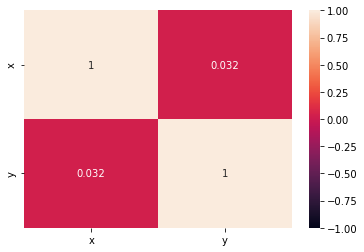

In [7]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show() #vou usar essa line para montar uma relação do fator de interferencia com as distancias

## Análise gráfica

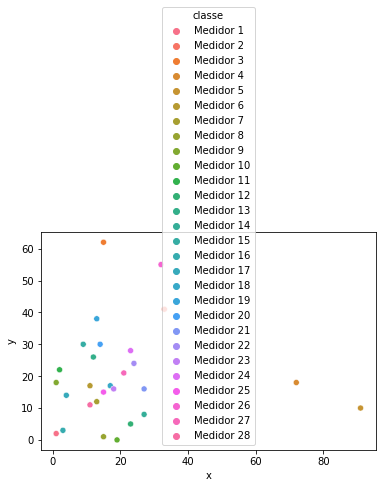

In [8]:
sns.scatterplot(data=df, x='x', y='y', hue='classe')
plt.show()

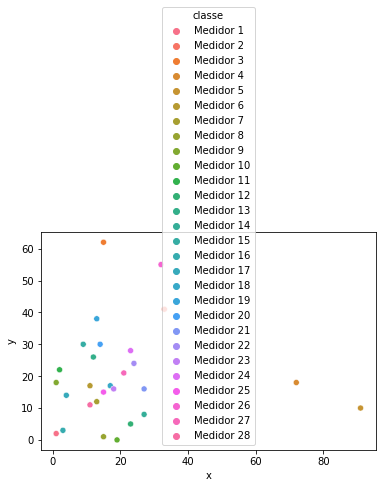

In [9]:
sns.scatterplot(data=df, x='x', y='y', hue='classe')
plt.show() #plotar novamente o grafico para mostrar como essa disposição muda com o fator de interferencia tendo em vista as distancias de comunicação maximas.

 Aplicando modelo do KNN

In [10]:
# Colunas dos "features" -> são todas as colunas menos a coluna de classe dos medidores
X = np.array(df.drop(['classe'], 1))

# Colunas do "target" - > deve ser a classe
y = np.array(df['classe'])


In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.35, random_state=0)


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((18, 2), (18,), (10, 2), (10,))

In [13]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [23]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8, metric='euclidean')


In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [25]:
accuracy = clf.score(X_train, y_train)
accuracy

0.1111111111111111

In [26]:
agg = pd.read_csv('agregadores.csv')

In [27]:
agg.head()

,x,y,classe
0,8.0,7.0,Agregador 1
1,6.0,4.0,Agregador 2
2,8.0,4.0,Agregador 3
3,3.0,1.0,Agregador 4
4,8.0,9.0,Agregador 5


In [28]:
# Dados da pessoa que queremos prever
agregador = np.array([8,7])

# Alterando seu formato
agregador = agregador.reshape(1,-1)

# Normalizar os números, que nem fizemos anteriormente
agregador = sc_X.transform(agregador)

# Prevendo sua faixa de renda.
predicao = clf.predict(agregador)

print(predicao)

['Medidor 1']
